In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [8]:
employee_DataFrame = pd.read_csv('shopping_trends_updated.csv')
print(employee_DataFrame)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py", line 3790, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'target'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, s

In [3]:
y = employee_DataFrame['Gender']


X = employee_DataFrame[['Age', 'Category', 'Purchase Amount (USD)', 'Size', 'Color']]
oneHotEncoder = OneHotEncoder(sparse=False)

list_to_encode = ['Category', 'Size', 'Color']
for category in list_to_encode:
    encoded_df = pd.DataFrame(oneHotEncoder.fit_transform(X[[category]]), columns=[category for category in oneHotEncoder.get_feature_names_out([category])])
    X = X.join(encoded_df)
    X = X.drop([category], axis=1)
print(X)

      Age  Purchase Amount (USD)  Category_Accessories  Category_Clothing  \
0      55                     53                   0.0                1.0   
1      19                     64                   0.0                1.0   
2      50                     73                   0.0                1.0   
3      21                     90                   0.0                0.0   
4      45                     49                   0.0                1.0   
...   ...                    ...                   ...                ...   
3895   40                     28                   0.0                1.0   
3896   52                     49                   1.0                0.0   
3897   46                     33                   1.0                0.0   
3898   44                     77                   0.0                0.0   
3899   52                     81                   1.0                0.0   

      Category_Footwear  Category_Outerwear  Size_L  Size_M  Size_S  Size_X

C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be r

In [4]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)


247       Male
2591      Male
1822      Male
3483    Female
2771    Female
         ...  
1130      Male
1294      Male
860       Male
3507    Female
3174    Female
Name: Gender, Length: 3120, dtype: object


Accuracy =  0.7076923076923077


[Text(0.5, 0.875, 'x[0] <= 52.5\ngini = 0.44\nsamples = 3120\nvalue = [1020, 2100]'),
 Text(0.25, 0.625, 'x[0] <= 42.5\ngini = 0.449\nsamples = 2056\nvalue = [701, 1355]'),
 Text(0.125, 0.375, 'x[7] <= 0.5\ngini = 0.438\nsamples = 1478\nvalue = [478, 1000]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 809\nvalue = [243, 566]'),
 Text(0.1875, 0.125, 'gini = 0.456\nsamples = 669\nvalue = [235, 434]'),
 Text(0.375, 0.375, 'x[6] <= 0.5\ngini = 0.474\nsamples = 578\nvalue = [223, 355]'),
 Text(0.3125, 0.125, 'gini = 0.457\nsamples = 425\nvalue = [150, 275]'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 153\nvalue = [73, 80]'),
 Text(0.75, 0.625, 'x[0] <= 54.5\ngini = 0.42\nsamples = 1064\nvalue = [319, 745]'),
 Text(0.625, 0.375, 'x[34] <= 0.5\ngini = 0.354\nsamples = 126\nvalue = [29, 97]'),
 Text(0.5625, 0.125, 'gini = 0.332\nsamples = 119\nvalue = [25, 94]'),
 Text(0.6875, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.875, 0.375, 'x[1] <= 64.5\ngini = 0.427\nsamples = 9

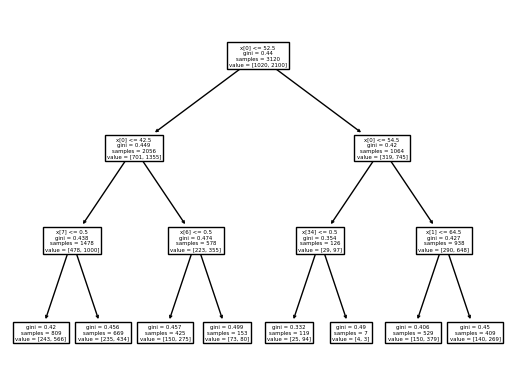

In [5]:
from sklearn import tree
from sklearn import metrics
import graphviz
set_depth = 3

clf = tree.DecisionTreeClassifier(max_depth=set_depth)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(f'Accuracy = ', metrics.accuracy_score(y_test, predictions))
tree.plot_tree(clf)

Accuracy =  0.7051282051282052
Значимость переменных:
0 Age: 0.2560046407928379
1 Purchase Amount (USD): 0.23829122268121436
2 Category_Accessories: 0.037331528367940965
3 Category_Clothing: 0.024680212894823635
4 Category_Footwear: 0.016756477364235804
5 Category_Outerwear: 0.027973760958611302
6 Size_L: 0.04306250757330826
7 Size_M: 0.06503814865172149
8 Size_S: 0.028624480846425396
9 Size_XL: 0.008167311986863717
10 Color_Beige: 0.011631379739874662
11 Color_Black: 0.0031060535860872405
12 Color_Blue: 0.0
13 Color_Brown: 0.02627274485746337
14 Color_Charcoal: 0.02467312695201395
15 Color_Cyan: 0.007356832708844365
16 Color_Gold: 0.0016422599206102476
17 Color_Gray: 0.0
18 Color_Green: 0.0
19 Color_Indigo: 0.001418224266561353
20 Color_Lavender: 0.000908119804105347
21 Color_Magenta: 0.009349731341529251
22 Color_Maroon: 0.03641586147800981
23 Color_Olive: 0.015298318556640104
24 Color_Orange: 0.0084678959229137
25 Color_Peach: 0.01594386354428892
26 Color_Pink: 0.005484214630662829


array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x1FB7FE64740)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x1FB7FE64740)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x1FB7FE64740)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x1FB7FE64740)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x1FB7FE64740)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x1FB7FE64740)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
             

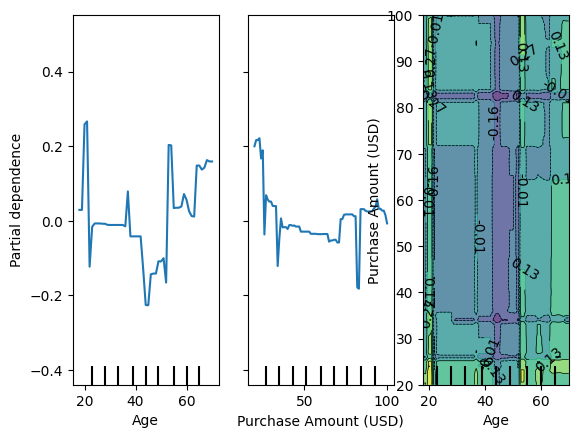

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

clf = GradientBoostingClassifier(max_depth=3, n_estimators=250, learning_rate=0.02)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(f'Accuracy = ', metrics.accuracy_score(y_test, predictions))

PartialDependenceDisplay.from_estimator(clf, X, [0, 1, (0, 1)])

print("Значимость переменных:")
for i, (feature, importance) in enumerate(zip(X.columns, clf.feature_importances_)):
    print(f"{i} {feature}: {importance}")

clf.estimators_


leaf_count = 2 -> Accuracy =  0.7076923076923077
leaf_count = 3 -> Accuracy =  0.7076923076923077
leaf_count = 4 -> Accuracy =  0.7025641025641025
leaf_count = 5 -> Accuracy =  0.7012820512820512
leaf_count = 6 -> Accuracy =  0.6974358974358974
leaf_count = 7 -> Accuracy =  0.6948717948717948
leaf_count = 8 -> Accuracy =  0.6897435897435897
leaf_count = 9 -> Accuracy =  0.6897435897435897
leaf_count = 10 -> Accuracy =  0.6897435897435897
leaf_count = 11 -> Accuracy =  0.6897435897435897
leaf_count = 12 -> Accuracy =  0.6897435897435897
leaf_count = 13 -> Accuracy =  0.6897435897435897
leaf_count = 14 -> Accuracy =  0.6897435897435897
leaf_count = 15 -> Accuracy =  0.6897435897435897
leaf_count = 16 -> Accuracy =  0.6897435897435897
leaf_count = 17 -> Accuracy =  0.6897435897435897
leaf_count = 18 -> Accuracy =  0.6897435897435897
leaf_count = 19 -> Accuracy =  0.6897435897435897
leaf_count = 20 -> Accuracy =  0.6897435897435897
leaf_count = 21 -> Accuracy =  0.6897435897435897
leaf_cou

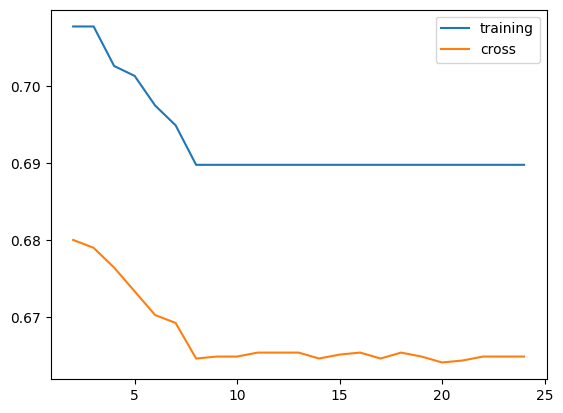

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
max_tree_leaf = 25
value = []
cross = []
x = [i for i in range(2,max_tree_leaf)]
for leaf_count in range(2, max_tree_leaf, 1):
    clf = GradientBoostingClassifier(max_leaf_nodes=leaf_count)
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(f'leaf_count = {leaf_count} -> Accuracy = ', metrics.accuracy_score(y_test, predictions))
    cross.append(cross_val_score(clf, X, y).mean())
    value.append(metrics.accuracy_score(y_test, predictions))
plt.plot(x, value, label=f"training")
plt.plot(x, cross, label=f"cross")
plt.legend()
plt.show()



tree_count = 1 -> Accuracy =  0.7076923076923077
tree_count = 2 -> Accuracy =  0.7076923076923077
tree_count = 3 -> Accuracy =  0.7076923076923077
tree_count = 4 -> Accuracy =  0.7076923076923077
tree_count = 5 -> Accuracy =  0.7076923076923077
tree_count = 6 -> Accuracy =  0.7076923076923077
tree_count = 7 -> Accuracy =  0.7076923076923077
tree_count = 8 -> Accuracy =  0.7076923076923077
tree_count = 9 -> Accuracy =  0.7076923076923077
tree_count = 10 -> Accuracy =  0.7076923076923077
tree_count = 11 -> Accuracy =  0.7076923076923077
tree_count = 12 -> Accuracy =  0.7076923076923077
tree_count = 13 -> Accuracy =  0.7076923076923077
tree_count = 14 -> Accuracy =  0.7076923076923077
tree_count = 15 -> Accuracy =  0.7076923076923077
tree_count = 16 -> Accuracy =  0.7076923076923077
tree_count = 17 -> Accuracy =  0.7076923076923077
tree_count = 18 -> Accuracy =  0.7076923076923077
tree_count = 19 -> Accuracy =  0.7076923076923077
tree_count = 20 -> Accuracy =  0.7076923076923077
tree_coun

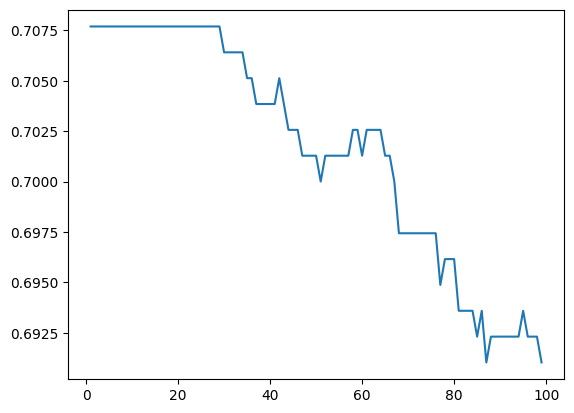

In [8]:
import matplotlib.pyplot as plt
max_tree_count = 100
value = []
x = [i for i in range(1,max_tree_count)]
for tree_count in range(1, max_tree_count, 1):
    clf = GradientBoostingClassifier(max_depth=3, n_estimators=tree_count)
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(f'tree_count = {tree_count} -> Accuracy = ', metrics.accuracy_score(y_test, predictions))
    value.append(metrics.accuracy_score(y_test, predictions))
plt.plot(x, value)

Depth 1 ready
Depth 11 ready
Depth 21 ready


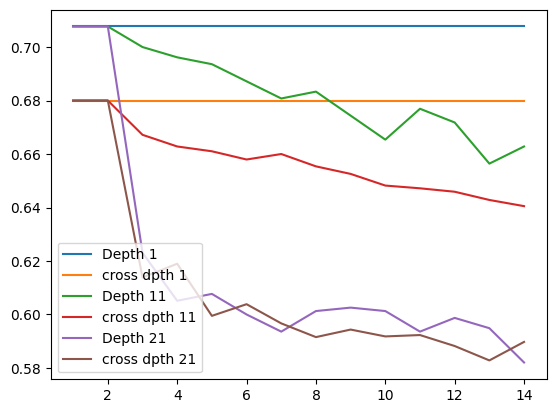

In [9]:
max_tree_count = 15
max_depth = 22
best_param = 0

for depth in range(1, max_depth, 10):
    value = []
    cross = []
    for tree_count in range(1, max_tree_count, 1):
        clf = GradientBoostingClassifier(max_depth=depth, n_estimators=tree_count)
        clf = clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        result = metrics.accuracy_score(y_test, predictions)
        cross.append(cross_val_score(clf, X, y).mean())
        value.append(result)
    print(f"Depth {depth} ready")
    plt.plot([i for i in range(1, max_tree_count)], value, label=f"Depth {depth}")
    plt.plot([i for i in range(1, max_tree_count)], cross, label=f'cross dpth {depth}')
    plt.legend()

Depth 1 ready
Depth 11 ready
Depth 21 ready


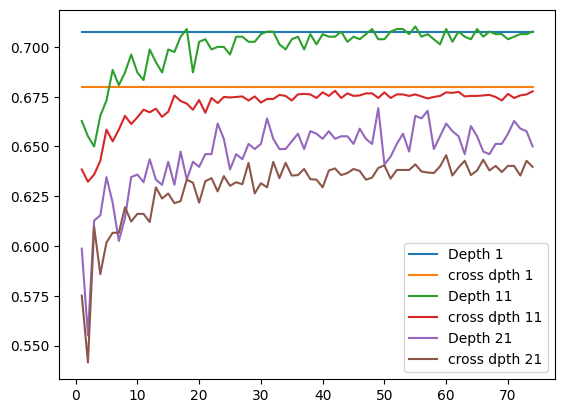

In [10]:
from sklearn.ensemble import RandomForestClassifier
max_tree_count = 75
max_depth = 22
value = []

for depth in range(1, max_depth, 10):
    value = []
    cross = []
    for tree_count in range(1, max_tree_count, 1):
        clf = RandomForestClassifier(max_depth=depth, n_estimators=tree_count)
        clf = clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        result = metrics.accuracy_score(y_test, predictions)
        cross.append(cross_val_score(clf, X, y).mean())
        value.append(result)
    print(f"Depth {depth} ready")
    plt.plot([i for i in range(1, max_tree_count)], value, label=f"Depth {depth}")
    plt.plot([i for i in range(1, max_tree_count)], cross, label=f'cross dpth {depth}')
    plt.legend()